<a href="https://colab.research.google.com/github/Cralsic123/CIFAR-image-detection/blob/main/CIFAR_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [1]:
!mkdir -o ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: invalid option -- 'o'
Try 'mkdir --help' for more information.
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c cifar-10

 97% 693M/715M [00:05<00:00, 197MB/s]
100% 715M/715M [00:05<00:00, 145MB/s]


In [3]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [4]:
# now we are going to extract the dataset

from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted successfully')

The dataset is extracted successfully


In [5]:
!ls


cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv




# We can see that it is a test.7z file such that 7z file so we cannot use the previous method to do the unzipping and hence we will be using another method.




In [6]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.2 MB/s eta 0:00:00


In [9]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode = 'r')
archive.extractall()
archive.close()

KeyboardInterrupt: 

# First we will make a very basic neural network and then we will be applying a pre trained model named ResNet50

In [10]:
# import the dependencies

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
type(filenames)
len(filenames)

50000

we wont have labels for the test data obviously

In [13]:
print(filenames[0:5])

['10573.png', '34895.png', '14968.png', '40990.png', '16507.png']


In [14]:
filenames[0]

'10573.png'

In [15]:
image = Image.open('/content/train' + '/' + filenames[0])


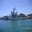

In [16]:
image

Labels processing

In [17]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [18]:
labels_df.shape

(50000, 2)

In [19]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [20]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [21]:
labels_df.head(20)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [22]:
labels_df.tail(20)

,id,label
49980,49981,dog
49981,49982,deer
49982,49983,cat
49983,49984,cat
49984,49985,deer
49985,49986,ship
49986,49987,horse
49987,49988,bird
49988,49989,dog
49989,49990,automobile


from above scenario we came to know that the ids are in order

# We will be numerically encode values

# If deer then its 0 like that


In [23]:
# we want to see if there are just 10 labels

labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [24]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [25]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [26]:
print(labels[0:5])

[6, 9, 9, 4, 1]


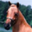

In [27]:
import cv2
from google.colab.patches import cv2_imshow
# first converts to numpy array then again to image
img = cv2.imread('/content/train/46283.png')
cv2_imshow(img)

In [28]:
labels_df[labels_df['id']== 46283]

,id,label
46282,46283,horse


In [29]:
id_list = list(labels_df['id']) # storing the ids in a list

In [30]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


IMAGE PROCESSING

In [31]:
# convert images to numpy arrays and reading all of them in a folder

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [32]:
type(data)


list

In [33]:
len(data)


50000

In [34]:
type(data[0])


numpy.ndarray

In [35]:
data[0].shape

(32, 32, 3)

The 3 is because its a color image so RGB

In [36]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [37]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [38]:
type(X)

numpy.ndarray

In [39]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


It shows there are 50000 images with 32 X 32 shape and 3 color channels

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [42]:
X

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

# Previously we saw that the data array had different values in the array. Now we will be scaling the values so that all the elements in the matrix has a value between 0 to 1

In [43]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [44]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

# Building the Neural Network

In [45]:
import tensorflow as tf
from tensorflow import keras

Keras helps to use tensorflow easier.
Initially the performance will be low but then the ResNet 50 will boost the performance.


Flatting does to pass the images in vectors


In [46]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

# Optimizer updates the weights
# The sparse one is a loss function
# If we had one hot encoder then we will be using categorical loss function



In [47]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [48]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 7s 4ms/step - loss: 1.9825 - acc: 0.2758 - val_loss: 1.8657 - val_acc: 0.3270
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8425 - acc: 0.3340 - val_loss: 1.8174 - val_acc: 0.3377
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7893 - acc: 0.3509 - val_loss: 1.7702 - val_acc: 0.3495
Epoch 4/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7590 - acc: 0.3654 - val_loss: 1.7335 - val_acc: 0.3688
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7397 - acc: 0.3747 - val_loss: 1.7444 - val_acc: 0.3702
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7266 - acc: 0.3799 - val_loss: 1.7234 - val_acc: 0.3792
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7183 - acc: 0.3826 - val_loss: 1.7588 - val_acc: 0.3665
Epoch 8/10
1125/1125 [==============================] - 4s 4ms

# Accuracy so far is 34%


# Now we will be using the concept of transfer learning where we take a pre-trained model that has been previously well trained with lots of data and then use it here.

# IN THIS CASE IT IS ResNet50

In [49]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [50]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

# imagenet is a image dataset which contains millions of images and it imports the weights from this data
# include_top = False means it will import the ResNet50 but it doesnt import the last neuron
# Instead it uses our last neuron

convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

# We are going to add some our own layers


In [51]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

# we have upscaled the data because ResNet is trained on 256,256,3
# and we have 32,32,3
# so we are multiplying by 2 for 3 times

model.add(convolutional_base)
model.add(layers.Flatten())

# Flatten for single column or dimension

model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

# Dropout basically turns of few neurons to prevent overfitting

model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [52]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [64]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [53]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 469s 389ms/step - loss: 2.2572 - acc: 0.1779 - val_loss: 2.3564 - val_acc: 0.1975
Epoch 2/10
1125/1125 [==============================] - 436s 388ms/step - loss: 1.8257 - acc: 0.2911 - val_loss: 1.7837 - val_acc: 0.3120
Epoch 3/10
1125/1125 [==============================] - 445s 395ms/step - loss: 1.6637 - acc: 0.3569 - val_loss: 2.2192 - val_acc: 0.4400
Epoch 4/10
1125/1125 [==============================] - 446s 396ms/step - loss: 1.4230 - acc: 0.4773 - val_loss: 2.4466 - val_acc: 0.5318
Epoch 5/10
1125/1125 [==============================] - 440s 391ms/step - loss: 1.2314 - acc: 0.5657 - val_loss: 1.2901 - val_acc: 0.5275
Epoch 6/10
1125/1125 [==============================] - 441s 392ms/step - loss: 1.1027 - acc: 0.6210 - val_loss: 0.9539 - val_acc: 0.6538
Epoch 7/10
1125/1125 [==============================] - 441s 392ms/step - loss: 0.9895 - acc: 0.6654 - val_loss: 1.0826 - val_acc: 0.6230
Epoch 8/10
1125/1125 [============

In [54]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 41s 120ms/step - loss: 0.7960 - acc: 0.7330
Test Accuracy = 0.7329999804496765


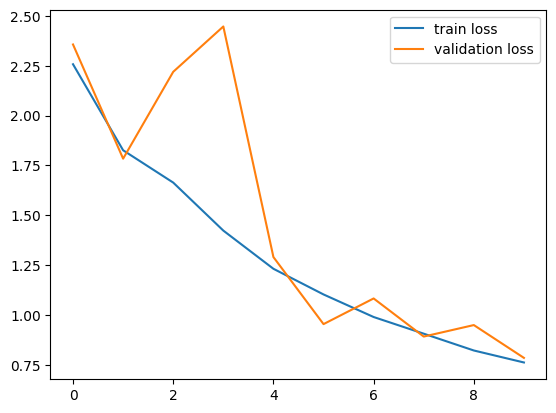

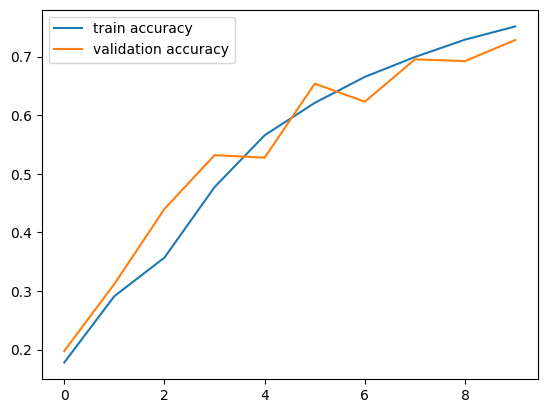

In [55]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()